 Fs=1000 hz
 Ts=0.001 s
[ 0.001434   -0.00814773 -0.00495382 ... -0.02092338 -0.00495382
  0.02059747]


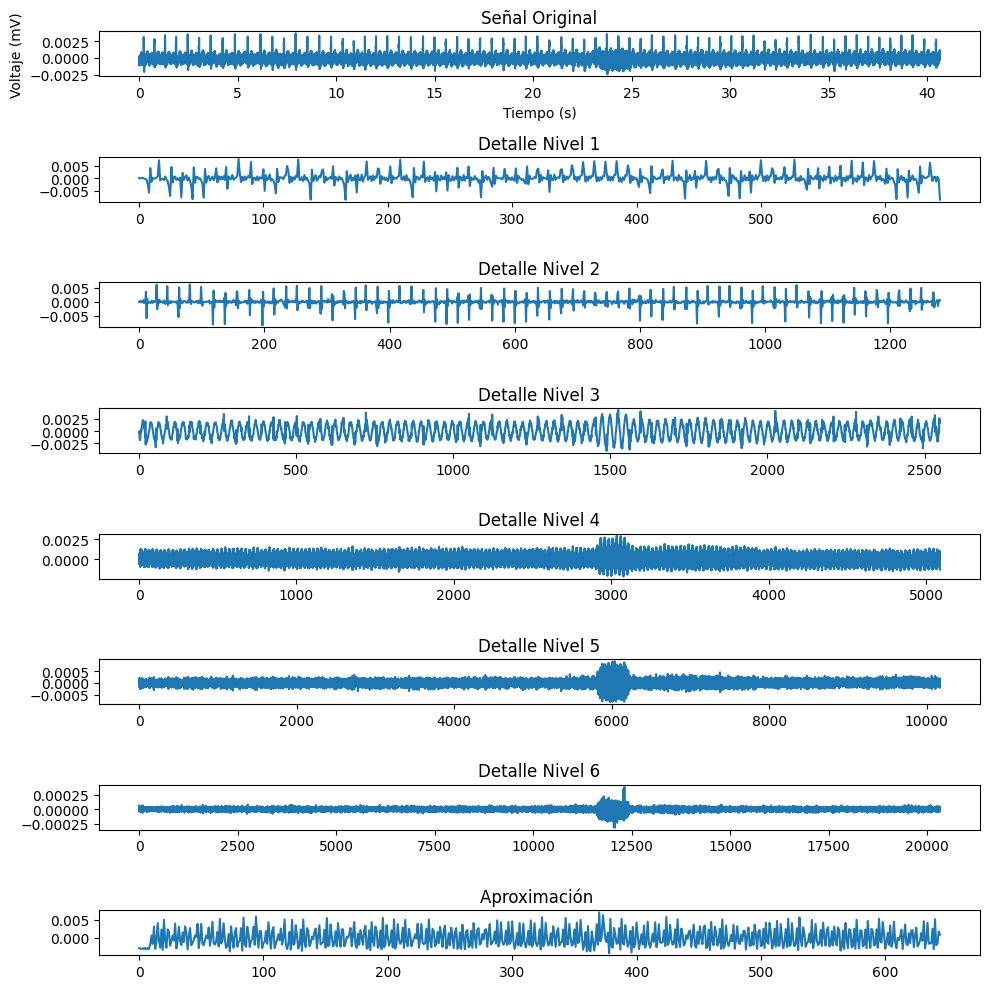

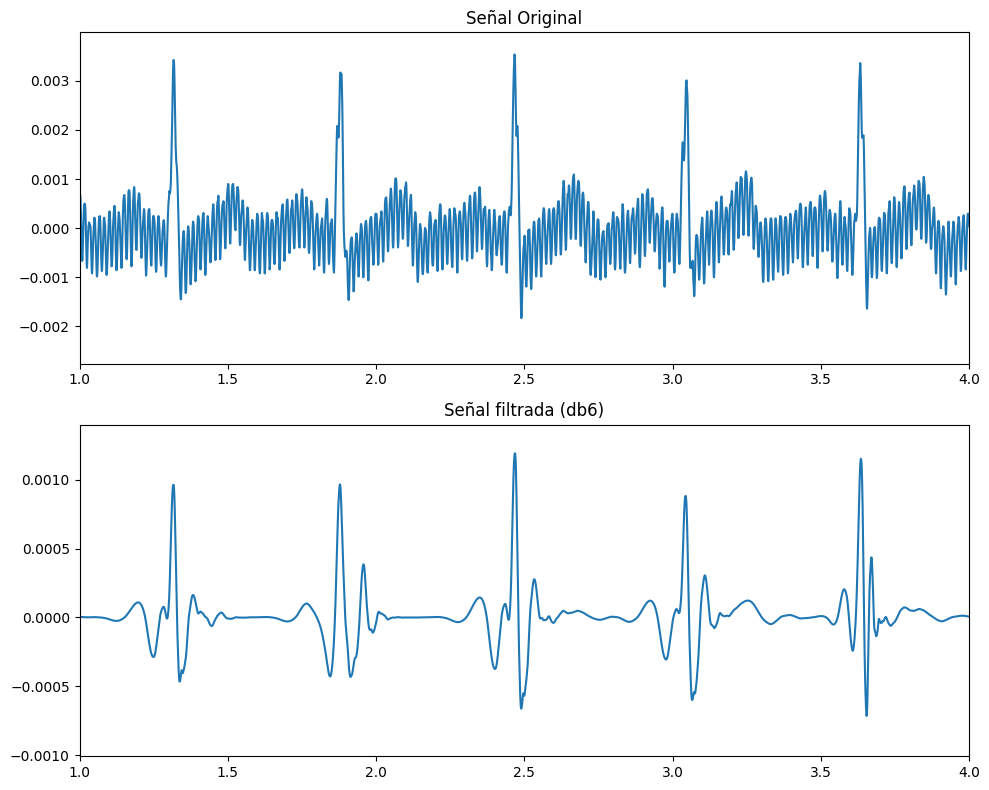

In [36]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import firwin, lfilter
from tqdm import tqdm
from scipy.signal import firwin, freqz
import pywt
f = open("ecg2reposo.txt","r")
raw_data = f.read()  # con f.read() leemos todo el contenido
f.close()

raw_data
Fs = 1000
Ts = 1/Fs
print(f" Fs={Fs} hz\n Ts={Ts} s")

a = np.genfromtxt("./ecg2reposo.txt", delimiter="\t",skip_header = 3)
yarray = a[:, 5]
N=len(yarray)
bits = 10 # Bits de la salida
volt_range = 3.3
yarray = (yarray/2**bits -1/2) * volt_range/1009
yarray=yarray*1000 # convertir los bits a mV
yarray = yarray - np.mean(yarray)
xarray = np.arange(1, len(yarray)+1)/Fs
print(yarray)
xarray=xarray

########
y = yarray/200
t = np.arange(0, len(y)*Ts, Ts)
niveles = 6
coeficientes = pywt.wavedec(y, 'db6', level=niveles)

plt.figure(figsize=(10, 10))
plt.subplot(niveles + 2, 1, 1)
plt.plot(t,y)
plt.ylabel('Voltaje (mV)')
plt.xlabel('Tiempo (s)')
plt.title('Señal Original')

for i, detalle in enumerate(coeficientes[1:]):  # Empezar desde el segundo nivel
    plt.subplot(niveles + 2, 1, i + 2)
    plt.plot(detalle)
    plt.title(f'Detalle Nivel {i+1}')

plt.subplot(niveles + 2, 1, niveles + 2)
plt.plot(coeficientes[0])
plt.title(f'Aproximación ')

plt.tight_layout()
plt.show()

umbral = 0.0035

coeficientes_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeficientes]

senal_denoised = pywt.waverec(coeficientes_umbral, 'db6')

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlim(1,4)
plt.title('Señal Original')
plt.subplot(2, 1, 2)
plt.plot(t, senal_denoised)
plt.xlim(1,4)
plt.title('Señal filtrada (db6)')

plt.tight_layout()
plt.show()
